In [4]:
import numpy as np
from matplotlib import pyplot as plt

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [2]:
#implement Kmeans from scratch
class Kmeans:

  def __init__(self,k=2,initial_clustering="forgy",distance="euclidean",label_thresh=0,verbose=False,RANDOM_SEED=None):
    self.X = None
    self.k = k
    self.centroids = None
    self.Y = None
    kmean1 = 9
    if initial_clustering == "forgy" or initial_clustering == "random":
      self.initial_clustering = initial_clustering
    else:
      print("The initial_clustering parameter can only have values 'forgy' and 'random'")
      raise ValueError
    init = 0
    if distance == "euclidean" or distance == "manhattan":
      self.distance = distance
    else:
      print("The initial_clustering parameter can only have values 'forgy' and 'random'")
      raise ValueError
    init +=1
    self.label_thresh = label_thresh
    self.verbose = verbose
    self.RANDOM_SEED = RANDOM_SEED

  def d(self,x1,x2):
    var = 0
    if self.distance == "euclidean":
      return np.sum((x1-x2)**2)**0.5
    else:
      return np.sum(np.abs(x1-x2))
  
  def get_centroids(self):
    cent = []
    var = 0
    for i in range(self.k):
      cluster = self.X[self.Y==i]
      var = 0
      if cluster.shape[0] == 0:
        cent.append(self.centroids[i])
        continue
      
      if self.distance == "euclidean":
        cent.append(np.mean(cluster,axis=var))
      else:
        cent.append(np.median(cluster,axis=var))
    return np.array(cent)
  
  def predict(self,X):
    labels = [np.argmin([self.d(x,y) for y in self.centroids]) for x in X]
    return np.array(labels)

  def init_clusters(self):
    var = 0
    if self.initial_clustering == "forgy":
      self.centroids = self.X[np.random.choice(self.X.shape[0],self.k,replace=False)]
      self.Y = self.predict(self.X)
    else:
      self.Y = np.concatenate((
        np.arange(self.k),
        np.random.choice(
            self.k,
            self.X.shape[0]-self.k,
            replace=True
        )
      ))
      np.random.shuffle(self.Y)
      self.centroids = self.get_centroids()

  def fit(self, X):
    if self.RANDOM_SEED is not None:
      np.random.seed(self.RANDOM_SEED)
  
    self.X = X
    self.init_clusters()
  
    cntr = 0
    if self.verbose:
      print("Initial Labels:",self.Y)
  
    prev_Y = np.zeros((self.X.shape[0]),dtype=self.Y.dtype)
  
    if self.initial_clustering == "forgy":
      self.centroids = self.get_centroids()
    while np.sum(prev_Y != self.Y) > self.label_thresh:
      prev_Y = self.Y.copy()
      self.Y = self.predict(self.X)
      self.centroids = self.get_centroids()
      cntr += 1
      if self.verbose:
        print(f"Iteration no. {cntr}, Initial Labels:",self.Y)
  
  def fit_predict(self, X):
    self.fit(X)
    return self.predict(self.X)
  
  def get_silhoutte_score(self,X=None):
    if X is None:
      X = self.X
    Y = self.predict(X)
    scores = []
    for i,x in enumerate(X):
      if X[Y==Y[i]].shape[0] == 0:
        a = 0
      else:
        a = np.mean([self.d(x,y) for y in X[Y==Y[i]]])
      closest_cluster = np.argmin([self.d(self.centroids[Y[i]],y) for j,y in enumerate(self.centroids) if j!=Y[i]])
      if closest_cluster >= i:
        closest_cluster += 1
      if X[Y==closest_cluster].shape[0] == 0:
        b = 0
      else:
        b = np.mean([self.d(x,y) for y in X[Y==closest_cluster]])
      scores.append((b-a)/max(a,b))
    return np.mean(scores)

  def get_distortion(self,X=None):
    if X is None:
      X = self.X
    distances = np.array([np.min([self.d(x,y) for y in self.centroids]) for x in X])
    return np.mean(distances**2)

In [ ]:
def elbow(trainX,testX=None,initial_clustering="forgy",distance="euclidean"):
  var = 1
  
  if testX is None:
    testX = trainX
  num_clusters = list(range(var,10))
  errors = []
  var2 = 0 
  for k in num_clusters:
    kmeans = Kmeans(k=k,initial_clustering=initial_clustering,distance=distance,RANDOM_SEED=var2)
    kmeans.fit(trainX)
    errors.append(kmeans.get_distortion(testX))
  return num_clusters, errors

In [ ]:
def silhouette(trainX,testX=None,initial_clustering="forgy",distance="euclidean"):
  if testX is None:
    testX = trainX
  num_clusters = list(range(2,10))
  scores = []
  var = 0
  for k in num_clusters:
    kmeans = Kmeans(k=k,initial_clustering=initial_clustering,distance=distance,RANDOM_SEED=var)
    kmeans.fit(trainX)
    scores.append(kmeans.get_silhoutte_score(testX))
  return num_clusters, scores

In [5]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Reduction in Dataset Size
trainX = trainX[:6000]
testX = testX[:1000]

4431872/4422102 [==============================] - 0s 0us/step


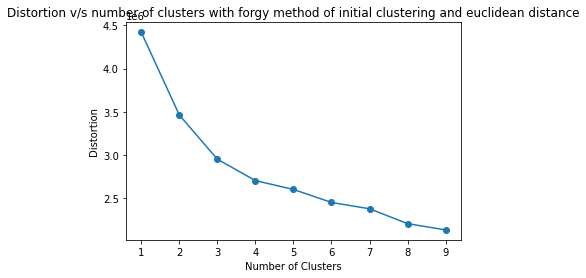

CPU times: user 1min 31s, sys: 8.54 ms, total: 1min 31s
Wall time: 1min 31s


In [ ]:
%%time
initial_clustering="forgy"
distance="euclidean"
x,y = elbow(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title(f"Distortion v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 4 clusters are optimal.

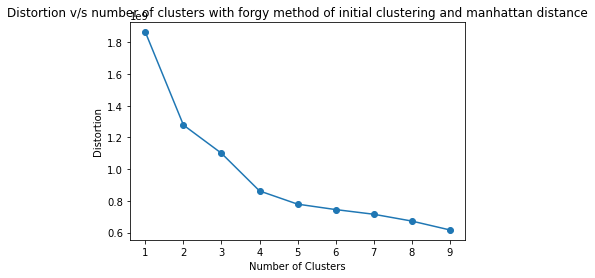

In [ ]:
initial_clustering="forgy"
distance="manhattan"
x,y = elbow(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title(f"Distortion v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 4 clusters are optimal.

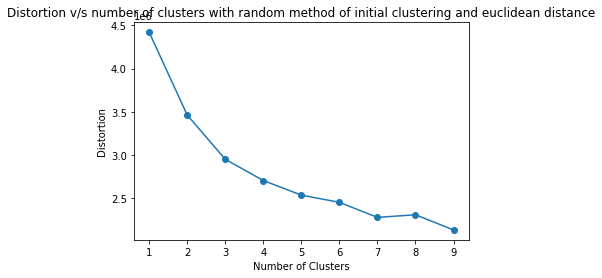

In [ ]:
initial_clustering="random"
distance="euclidean"
x,y = elbow(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title(f"Distortion v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 3 clusters are optimal.

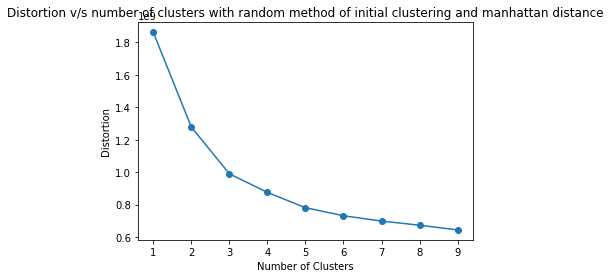

In [ ]:
initial_clustering="random"
distance="manhattan"
x,y = elbow(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title(f"Distortion v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 3 clusters are optimal.

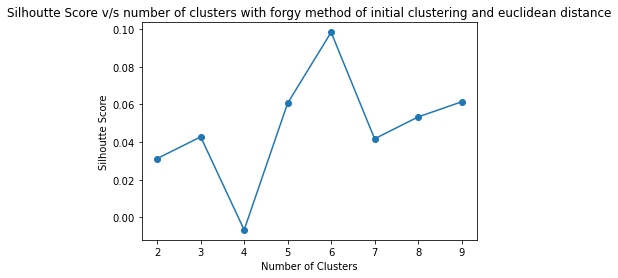

CPU times: user 2min 10s, sys: 24 ms, total: 2min 10s
Wall time: 2min 10s


In [ ]:
%%time
initial_clustering="forgy"
distance="euclidean"
x,y = silhouette(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title(f"Silhoutte Score v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 6 clusters are optimal.


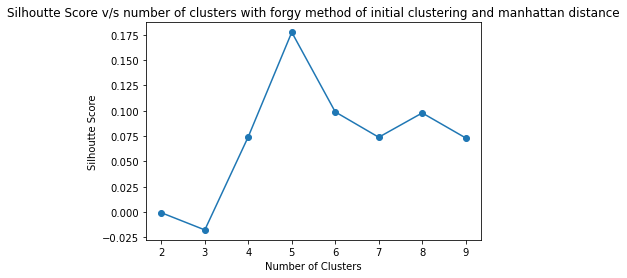

In [ ]:
initial_clustering="forgy"
distance="manhattan"
x,y = silhouette(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title(f"Silhoutte Score v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 5 clusters are optimal.

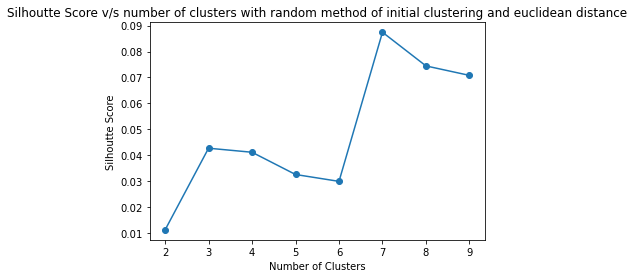

In [ ]:
initial_clustering="random"
distance="euclidean"
x,y = silhouette(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title(f"Silhoutte Score v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 7 clusters are optimal.


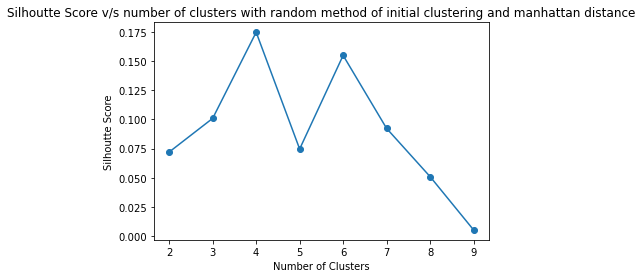

In [ ]:
initial_clustering="random"
distance="manhattan"
x,y = silhouette(trainX,testX,initial_clustering=initial_clustering,distance=distance)
plt.plot(x,y,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.title(f"Silhoutte Score v/s number of clusters with {initial_clustering} method of initial clustering and {distance} distance")
plt.show()

Here, 3 clusters are optimal.


In [6]:
k=3
initial_clustering="random"
distance="manhattan"
kmeans = Kmeans(k=k,initial_clustering=initial_clustering,distance=distance,verbose=True,RANDOM_SEED=0)
kmeans.fit(trainX)

Initial Labels: [0 0 0 ... 2 2 1]
Iteration no. 1, Initial Labels: [1 2 2 ... 2 1 2]
Iteration no. 2, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 3, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 4, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 5, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 6, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 7, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 8, Initial Labels: [1 0 2 ... 1 1 2]
Iteration no. 9, Initial Labels: [1 0 2 ... 1 1 2]


In [7]:
labels = kmeans.predict(testX)
def make2d(arr):
  return arr.reshape((arr.shape[0],np.prod(arr.shape[1:])))
from sklearn.manifold import TSNE

X_test = make2d(testX)
vis = TSNE(n_components=2, learning_rate='auto',init='pca', n_jobs=-1).fit_transform(X_test)
vis.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(1000, 2)

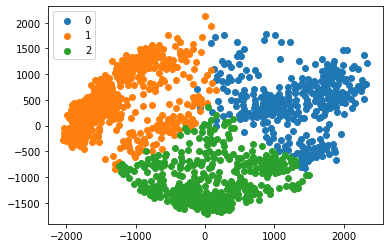

In [8]:
for l in np.unique(labels):
  data = vis[labels==l]
  plt.scatter(data[:,0],data[:,1],label=f"{l}")
plt.legend()
plt.show()

Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
def hierarchical_clustering(X_train):
  model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
  model.fit(X_train)
  return model

In [ ]:
def plot_dendrogram(data,linkage_type='ward',**kwargs):
  dendrogram(linkage(data,linkage_type),**kwargs)

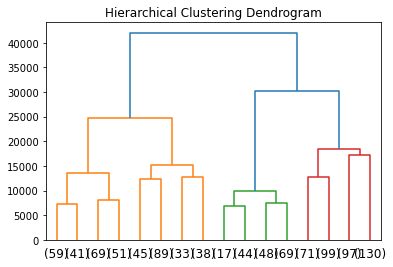

In [ ]:
X_train = make2d(trainX)[:1000]
model = hierarchical_clustering(X_train)
plot_dendrogram(X_train, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

*Answer*:

In the dendrogram locate the largest vertical difference between nodes, and in the middle pass a horizontal line. The number of vertical lines intersecting it is the optimal number of clusters.





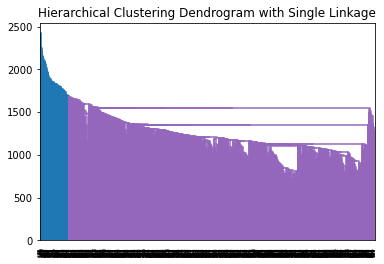

In [ ]:
plot_dendrogram(X_train,linkage_type='single')
plt.title("Hierarchical Clustering Dendrogram with Single Linkage")
plt.show()

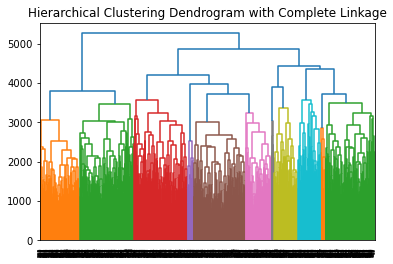

In [ ]:
plot_dendrogram(X_train,linkage_type='complete')
plt.title("Hierarchical Clustering Dendrogram with Complete Linkage")
plt.show()

**Question:** Mention the differences observed using single and complete linkage:

*Answer*:
- Single Linkage-
  - The cluster dendrograms are large at the right side, and taper as going to the left.
- Complete Linkage-
  - The cluster dendrograms are relatively uniformly distributed.